# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 12.5 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [https://contest.yandex.ru/contest/72492] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 12.3 (с учётом бонуса 0.75)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style='whitegrid')

import warnings

warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим три простых двумерных датасета сделанных с помощью `make_moons`, `make_circles`, `make_classification` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

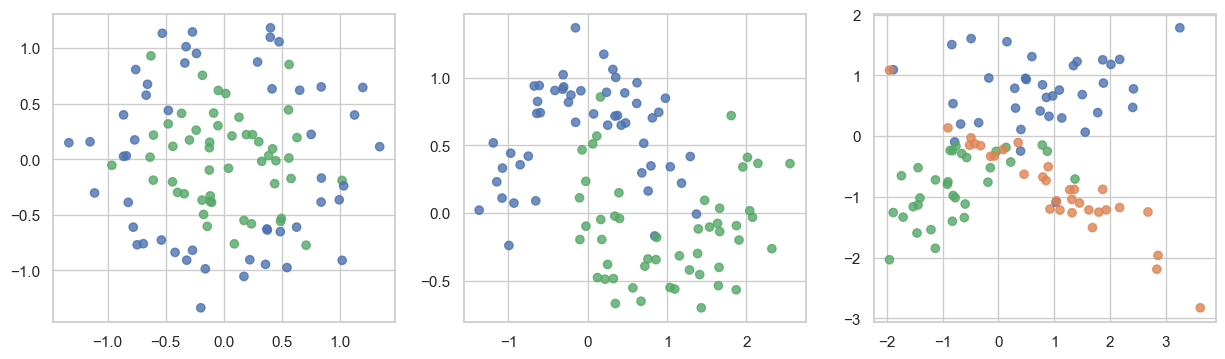

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

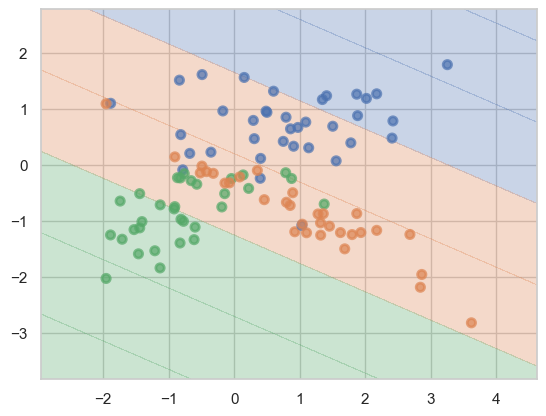

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

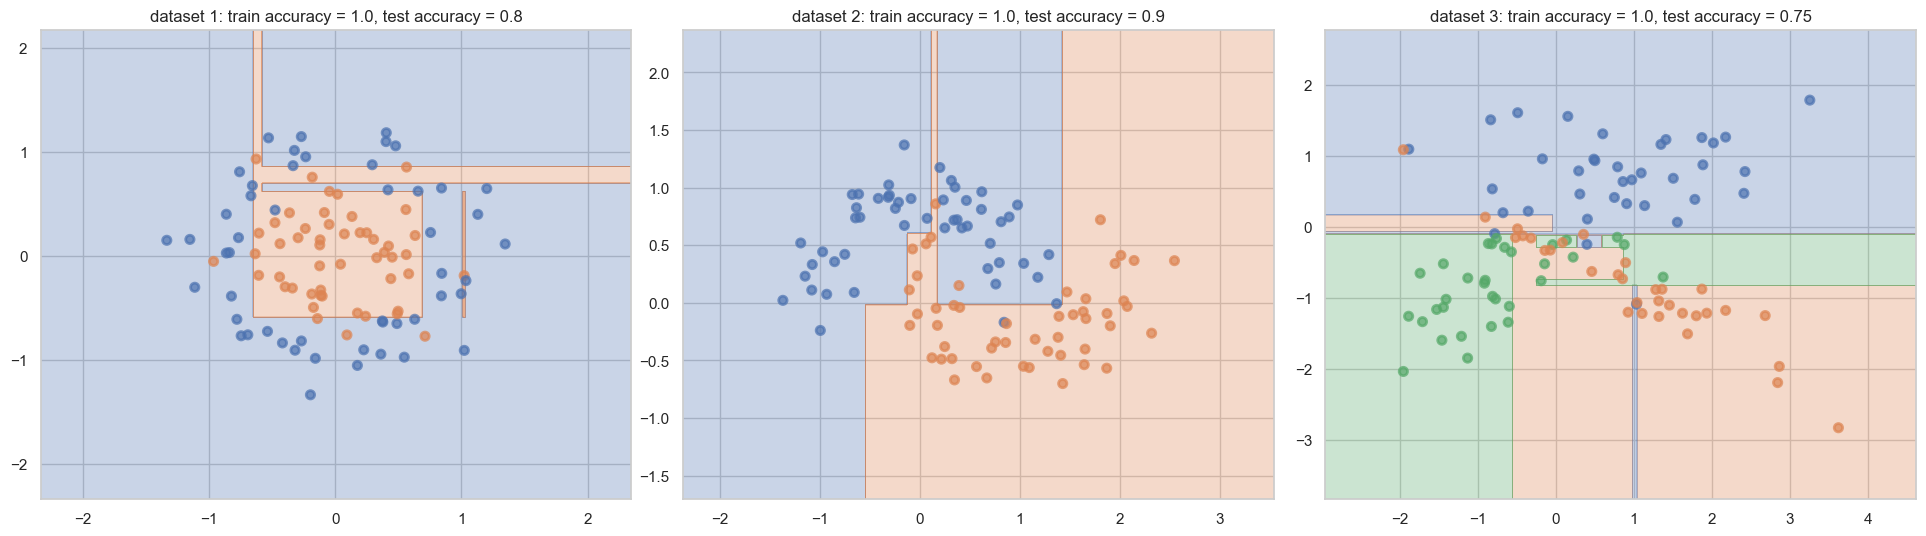

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

plt.figure(figsize=(20, 6))
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)

    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)

    acc_train = accuracy_score(y_train, train_pred)
    acc_test = accuracy_score(y_test, test_pred)

    plt.subplot(1, 3, i + 1)
    plot_surface(tree, X, y)
    plt.title(f'dataset {i+1}: train accuracy = {acc_train}, test accuracy = {acc_test}')

__Ответ:__ Да, деревья сильно переобучились, поскольку они имеют accuracy 1 на всех датасетах и на 0.2 хуже на тесте. При этом разделяющая поверхность имеет очень много выделений выбросов (тонких полосок)

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки / accuracy. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки. 

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

{1: {'test_accuracy': 0.95, 'max_depths': 23, 'min_samples_leafs': 4},
 2: {'test_accuracy': 1.0, 'max_depths': 34, 'min_samples_leafs': 4},
 3: {'test_accuracy': 0.95, 'max_depths': 12, 'min_samples_leafs': 12}}

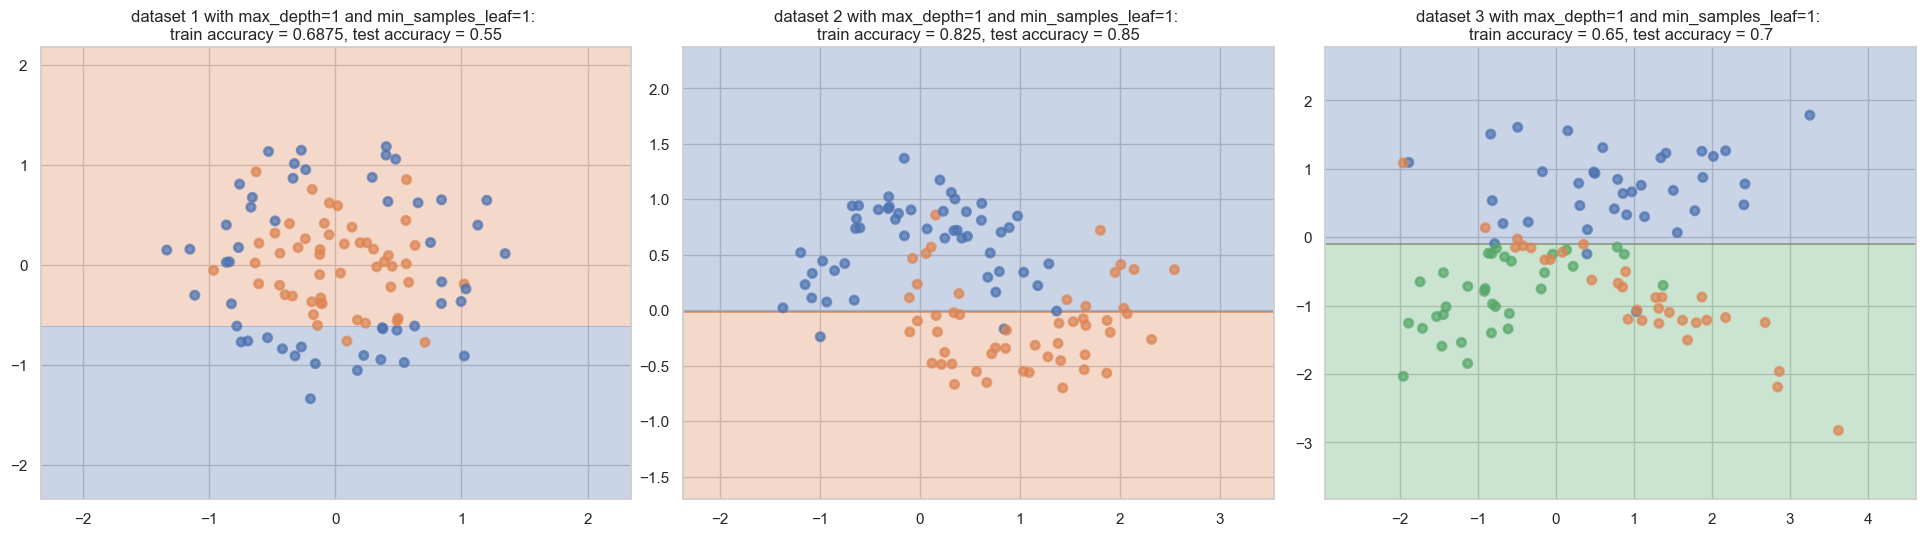

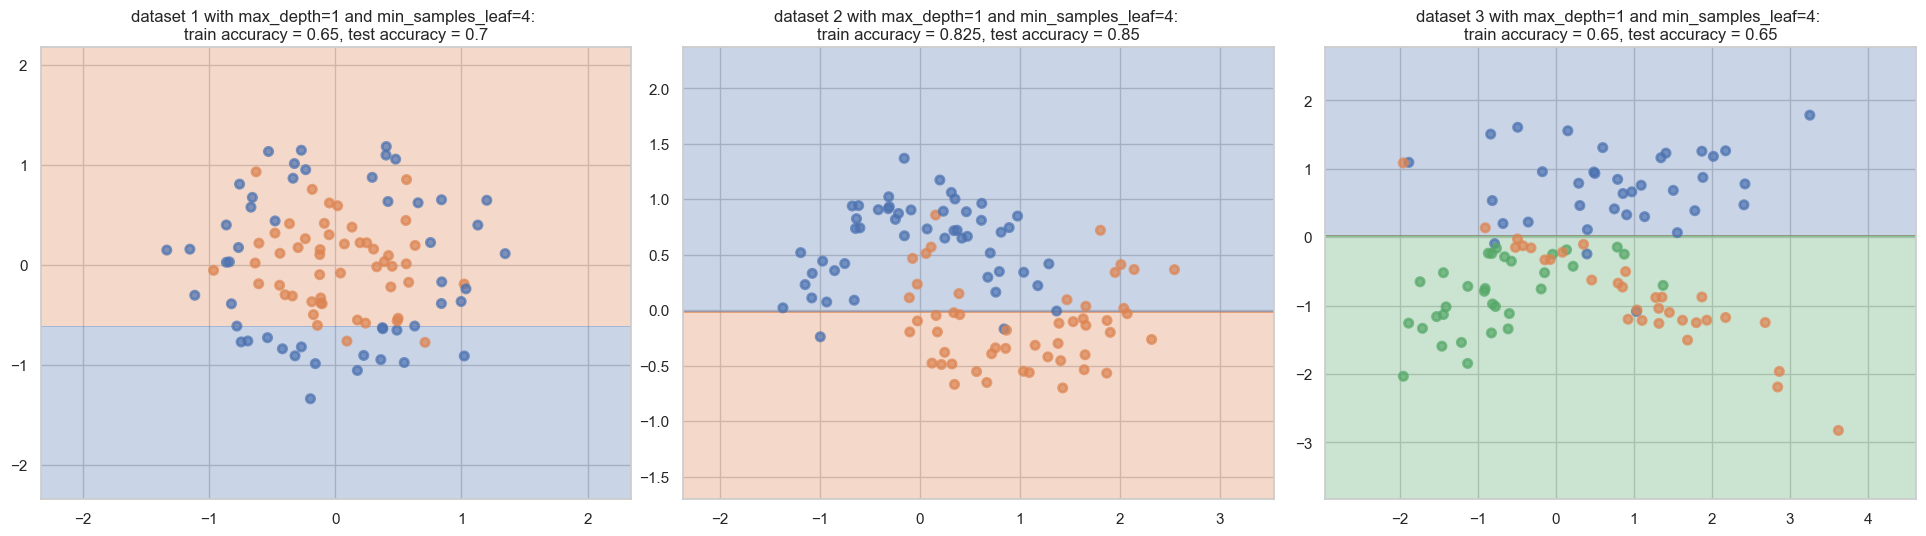

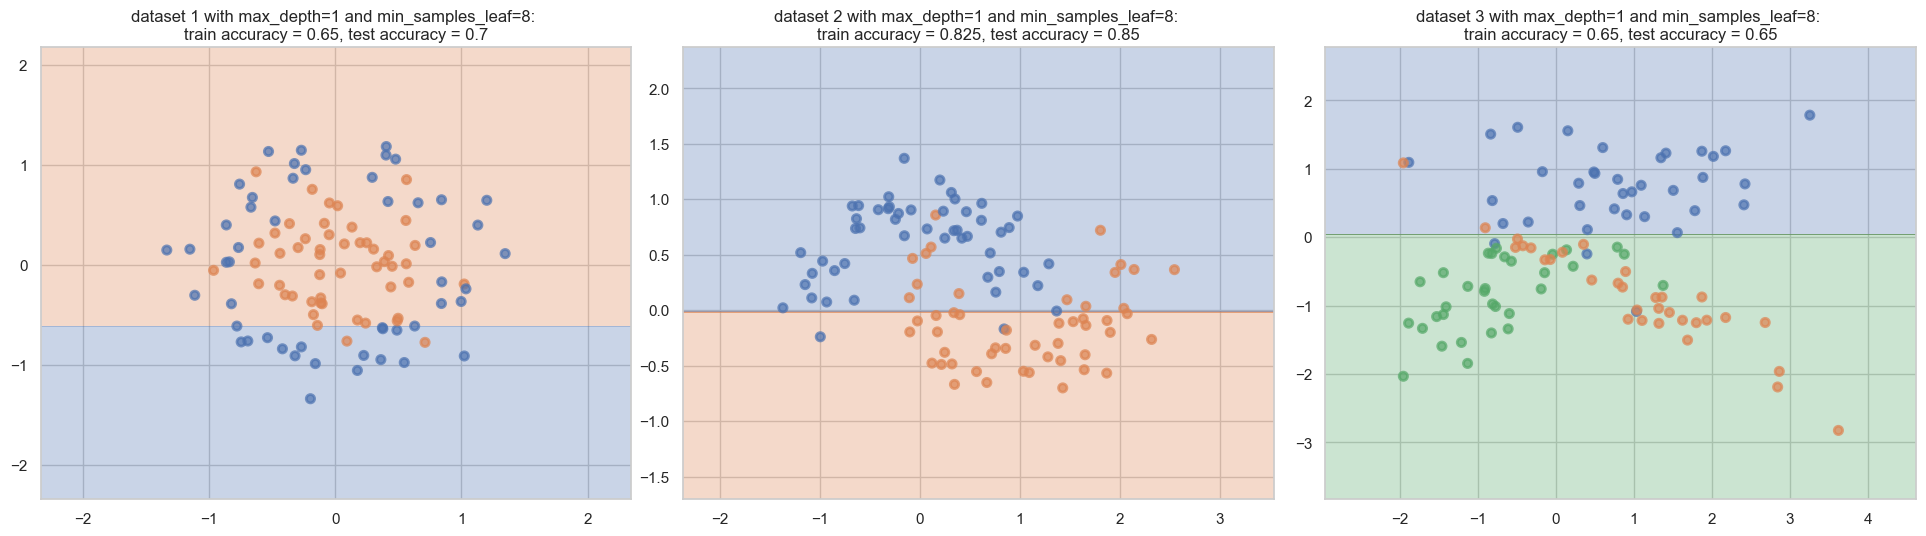

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

max_depths = np.linspace(1, 100, 10, dtype=int)
min_samples_leafs = np.linspace(1, 12, 4, dtype=int)

best_hyperparams = {
    1: {
        "test_accuracy": 0,
        "max_depths": -1,
        "min_samples_leafs": -1
    },
    2: {
        "test_accuracy": 0,
        "max_depths": -1,
        "min_samples_leafs": -1
    },
    3: {
        "test_accuracy": 0,
        "max_depths": -1,
        "min_samples_leafs": -1
    }
}

for max_depth in max_depths:
    for min_samples_leaf in min_samples_leafs:
        plt.figure(figsize=(20, 6))
        for i, (X, y) in enumerate(datasets):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
            tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            tree.fit(X_train, y_train)

            train_pred = tree.predict(X_train)
            test_pred = tree.predict(X_test)

            acc_train = accuracy_score(y_train, train_pred)
            acc_test = accuracy_score(y_test, test_pred)

            plt.subplot(1, 3, i + 1)
            plot_surface(tree, X, y)
            plt.title(
                f'dataset {i+1} with {max_depth=} and {min_samples_leaf=}: \ntrain accuracy = {acc_train}, test accuracy = {acc_test}')
            
            if acc_test > best_hyperparams[i+1]["test_accuracy"]:
                best_hyperparams[i+1]["test_accuracy"] = acc_test
                best_hyperparams[i+1]["max_depths"] = max_depth
                best_hyperparams[i+1]["min_samples_leafs"] = min_samples_leaf
best_hyperparams

__Ответ:__ Чем больше максимальная глубина дерева, тем оно больше переобучать до тех, пока дерево не начинает учить всю выборку. С минимальным количеством объектом в листе всё наоборот, чем меньше это количество, тем больше переобучение за счёт того, что деревья начинают всё больше уделять внимание каждому объекту, пока для каждого объекта не будет выделен свой личный leaf (при отсутствии ограничений по глубине).

1: {'test_accuracy': 0.95, 'max_depths': 34, 'min_samples_leafs': 1}
 2: {'test_accuracy': 1.0, 'max_depths': 12, 'min_samples_leafs': 4}
 3: {'test_accuracy': 0.9, 'max_depths': 12, 'min_samples_leafs': 12}
Лучшая обобщающая способность будет у деревьев с небольшой глубиной (за счёт того что выборка очень маленькая) и количество листьев, подобранных под эту глубину.

In [ ]:
def plot_surface_plotly(max_depth, min_samples_leaf):
    tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
    tree.fit(X_train, y_train)

    Z = tree.predict(grid).reshape(xx.shape)

    x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
    y_vals = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200)

    fig = graph_objects.Figure()
    fig.add_trace(graph_objects.Contour(
        x=x_vals, y=y_vals, z=Z,
        showscale=False, opacity=0.3,
        colorscale=['lightblue', 'lightcoral'],
        zmin=0, zmax=1, contours=dict(showlines=False)
    ))

    def scatter_points(data, labels, split, color, symbol):
        fig.add_trace(graph_objects.Scatter(
            x=data[labels == 0, 0], y=data[labels == 0, 1],
            mode='markers', marker=dict(color=color, symbol=symbol), name=f'{split} Class 0'
        ))
        fig.add_trace(graph_objects.Scatter(
            x=data[labels == 1, 0], y=data[labels == 1, 1],
            mode='markers', marker=dict(color=color, symbol=symbol, size=10, line=dict(width=2, color='DarkSlateGrey')),
            name=f'{split} Class 1'
        ))

    scatter_points(X_train, y_train, "Train", 'blue', 'circle')
    scatter_points(X_test, y_test, "Test", 'red', 'cross')

    fig.update_layout(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        legend=dict(x=0.7, y=1.15, orientation="h"),
        margin=dict(l=40, r=40, t=80, b=40)
    )

    return fig

In [ ]:
# Наворовал примеров из документации
import numpy as np
import plotly.graph_objects as graph_objects
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
    
for i in range(3):
    print("dataset", i+1)
    X, y = datasets[i]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    
    max_depths = np.linspace(1, 100, 10, dtype=int)
    min_samples_leafs = np.linspace(1, 12, 4, dtype=int)
    
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    initial_max_depth, initial_min_samples_leaf = 1, 1
    fig_initial = plot_surface_plotly(initial_max_depth, initial_min_samples_leaf)
    
    frames = []
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs:
            frame = graph_objects.Frame(data=plot_surface_plotly(max_depth, min_samples_leaf).data,
                             name=f"depth_{max_depth}_leaf_{min_samples_leaf}")
            frames.append(frame)
    
    fig_final = graph_objects.Figure(data=fig_initial.data, layout=fig_initial.layout, frames=frames)
    
    steps = []
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs:
            step = dict(
                method="animate",
                args=[
                    [f"depth_{max_depth}_leaf_{min_samples_leaf}"],
                    dict(mode="immediate",
                         frame=dict(duration=500, redraw=True),
                         transition=dict(duration=0))
                ],
                label=f"depth={max_depth}, leaf={min_samples_leaf}"
            )
            steps.append(step)
    # С двумя ползунками они накладывались друг на друга. Вроде требований на два нет
    # Сейчас один меняет оба
    fig_final.update_layout(
        sliders=[dict(
            active=0,
            currentvalue={"prefix": "max_depth and min_samples_leaf: "},
            pad={"t": 50},
            steps=steps
        )]
    )
    
    fig_final.show()

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
df = pd.read_csv('students.csv')
df

In [ ]:
X = df.drop(columns=["UNS"])
y = df["UNS"]
X.head()

In [ ]:
# Вместо обычного критерия Джини дополнительно использовал критерий информативности
# Чтобы лучше увидеть разделимость порогов
from hw5code import find_best_split

features = ["STG", "SCG", "STR", "LPR", "PEG"]
for feature in features:
    thres, Q_array, _, _ = find_best_split(X[feature], y)
    plt.plot(thres, Q_array, label=feature)
plt.title("Impurity for all features thresholds")
plt.xlabel("Threshold")
plt.ylabel("Impurity")
plt.legend()
plt.show()

И для критерия джини

In [ ]:
_, ax = plt.subplots(5, 1)

features = ["STG", "SCG", "STR", "LPR", "PEG"]
for feature_ind in range(len(features)):
    sns.scatterplot(x=X[features[feature_ind]], y=y, label=features[feature_ind], ax=ax[feature_ind])

plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Производить деление выборки на два поддерева стоит производить по признаку PEG.
Этот результат согласуется с диаграммой рассеивания
Хорошая кривая должна иметь высокие значения хаотичности ближе к средним порогам, идеально - в середине
невозможные признаки скорее напоминают впадину, которая поднимается только у левого или правого края
В случае с критерием Джини, наоборот, должны быть значения внизу ближе к средним порогам

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')
print(f"Dataset shape: {data.shape}")
data

In [ ]:
# Я понимаю, что кодировать нужно после разбиения на трейн/тест. Но ради эксперимента я вынужден...
from sklearn.preprocessing import LabelEncoder

data = data.apply(LabelEncoder().fit_transform)
data

In [ ]:
target = "p"

X = data.drop(columns=[target])
y = data[target]
display(X)
display(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

Проверю сначала на моделе из sklearn

In [ ]:
dt = DecisionTreeClassifier()
y = dt.fit(X_train, y_train)

In [ ]:
print(accuracy_score(y_train, dt.predict(X_train)))
print(accuracy_score(y_test, dt.predict(X_test)))  # неплохой результат

А теперь на своей

In [ ]:
X.isnull().count()  # Заметим, что в данных есть пропуски, которые я обрабатываю в коде дерева

In [ ]:
from hw5code import DecisionTree

dt = DecisionTree(feature_types=['categorical'] * len(X.columns))
dt.fit(X_train.to_numpy(), y_train.to_numpy()) 

In [ ]:
print(accuracy_score(y_train, dt.predict(X_train.to_numpy())))
print(accuracy_score(y_test, dt.predict(X_test.to_numpy())))
# Результы такие хорошие, потому что я реализовал заполнение пропусков

__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (https://github.com/esokolov/ml-course-hse/blob/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv).

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data', 
                        header=None)
data

In [ ]:
# Я понимаю, что кодировать нужно после разбиения на трейн/тест. Но ради эксперимента я вынужден...
from sklearn.preprocessing import LabelEncoder

data = data.apply(LabelEncoder().fit_transform)
data

In [ ]:
target = 9

X = data.drop(columns=[target])
y = data[target]
display(X)
display(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

In [ ]:
max_depths = np.linspace(1, 100, 20)
train_accuracies, test_accuracies = [], []


for max_depth in max_depths:
    tree = DecisionTree(feature_types=['categorical'] * len(X.columns), max_depth = max_depth)
    tree.fit(X_train.to_numpy(), y_train.to_numpy())
    train_accuracies.append(accuracy_score(y_train, tree.predict(X_train.to_numpy())))
    test_accuracies.append(accuracy_score(y_test, tree.predict(X_test.to_numpy())))
    
plt.figure(figsize=(20, 6))
plt.plot(max_depths, train_accuracies, label = 'Train accuracy')
plt.plot(max_depths, test_accuracies, label = 'Test accuracy')

plt.xticks(max_depths)
plt.xlabel('max depth')
plt.ylabel('accuracy')

plt.legend()
plt.show()

In [ ]:
min_samples_splits = np.linspace(1, 50, 20)
train_accuracies, test_accuracies = [], []

for min_samples_split in min_samples_splits:
    tree = DecisionTree(feature_types=['categorical'] * len(X.columns), min_samples_split=min_samples_split)
    tree.fit(X_train.to_numpy(), y_train.to_numpy())
    train_accuracies.append(accuracy_score(y_train, tree.predict(X_train.to_numpy())))
    test_accuracies.append(accuracy_score(y_test, tree.predict(X_test.to_numpy())))

plt.figure(figsize=(20, 6))
plt.plot(max_depths, train_accuracies, label='Train accuracy')
plt.plot(max_depths, test_accuracies, label='Test accuracy')

plt.xticks(max_depths)
plt.xlabel('max depth')
plt.ylabel('accuracy')

plt.legend()
plt.show()

In [ ]:
min_samples_leafs = np.linspace(1, 50, 20)
train_accuracies, test_accuracies = [], []

for min_samples_leaf in min_samples_leafs:
    tree = DecisionTree(feature_types=['categorical'] * len(X.columns), min_samples_leaf=min_samples_leaf)
    tree.fit(X_train.to_numpy(), y_train.to_numpy())
    train_accuracies.append(accuracy_score(y_train, tree.predict(X_train.to_numpy())))
    test_accuracies.append(accuracy_score(y_test, tree.predict(X_test.to_numpy())))

plt.figure(figsize=(20, 6))
plt.plot(max_depths, train_accuracies, label='Train accuracy')
plt.plot(max_depths, test_accuracies, label='Test accuracy')

plt.xticks(max_depths)
plt.xlabel('max depth')
plt.ylabel('accuracy')

plt.legend()
plt.show()

Всё работает. Стоило бы немного подкрутить гиперпараметры, чтобы улучшить обобщающую способность

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Перебираете все пороги
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [ ]:
from hw5code import LinearRegressionTree # я реализовал только на 1.8
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score # Теперь не классификация
from sklearn.datasets import fetch_california_housing
# Выбор без выбора. Только один для регрессии.

df = fetch_california_housing()
df

In [ ]:
X = pd.DataFrame(data=df["data"], columns=df["feature_names"])
y = df["target"]
X.head()

In [ ]:
y

In [ ]:
np.linspace(1, 100, 20)

In [ ]:
max_depths = np.linspace(10, 30, 3, dtype=int)
min_samples_splits = np.linspace(3, 9, 3, dtype=int)
min_samples_leafs = np.linspace(3, 9, 3, dtype=int)

best_hyperparams = {
    "linear": {
        "test_mse": float("+inf"),
        "test_r2": 0,
        "max_depth": -1,
        "min_samples_split": -1,
        "min_samples_leaf": -1
    },
    "sklearn": {
        "test_mse": float("+inf"),
        "test_r2": 0,
        "max_depth": -1,
        "min_samples_split": -1,
        "min_samples_leaf": -1
    }
}

for max_depth in max_depths:
    for min_samples_leaf in min_samples_leafs:
        for min_samples_split in min_samples_splits:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

            tree_linear = LinearRegressionTree(
                feature_types=['real'] * X.shape[1],
                max_depth=max_depth, 
                min_samples_leaf=min_samples_leaf, 
                min_samples_split=min_samples_split
            )
            tree_sklearn = DecisionTreeRegressor(
                max_depth=max_depth, 
                min_samples_leaf=min_samples_leaf, 
                min_samples_split=min_samples_split
            )
            tree_linear.fit(X_train.to_numpy(), y_train)
            tree_sklearn.fit(X_train, y_train)

            train_pred_linear = tree_linear.predict(X_train.to_numpy())
            test_pred_linear = tree_linear.predict(X_test.to_numpy())
            
            train_pred_sklearn = tree_sklearn.predict(X_train)
            test_pred_sklearn = tree_sklearn.predict(X_test)
            
            if mean_squared_error(y_test, test_pred_linear) < best_hyperparams["linear"]["test_mse"]:
                best_hyperparams["linear"]["test_mse"] = mean_squared_error(y_test, test_pred_linear)
                best_hyperparams["linear"]["test_r2"] = r2_score(y_test, test_pred_linear)
                best_hyperparams["linear"]["max_depth"] = max_depth
                best_hyperparams["linear"]["min_samples_split"] = min_samples_split
                best_hyperparams["linear"]["min_samples_leaf"] = min_samples_leaf
            
            if mean_squared_error(y_test, test_pred_sklearn) < best_hyperparams["sklearn"]["test_mse"]:
                best_hyperparams["sklearn"]["test_mse"] = mean_squared_error(y_test, test_pred_sklearn)
                best_hyperparams["sklearn"]["test_r2"] = r2_score(y_test, test_pred_sklearn)
                best_hyperparams["sklearn"]["max_depth"] = max_depth
                best_hyperparams["sklearn"]["min_samples_split"] = min_samples_split
                best_hyperparams["sklearn"]["min_samples_leaf"] = min_samples_leaf
                
best_hyperparams

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

In [ ]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95,
                                                    random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))
# Моё
tree = LinearRegressionTree(feature_types=['real'] * x.shape[1])
tree.fit(x_train, y_train)

pred_train, pred_test = tree.predict(x_train), tree.predict(x_test)
print("Linear Tree (my)")
print(f"Train: MSE={mean_squared_error(y_train, pred_train)}, r2={r2_score(y_train, pred_train)}")
print(f"Test: MSE={mean_squared_error(y_test, pred_test)}, r2={r2_score(y_test, pred_test)}")


# sklearn
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

pred_train, pred_test = tree.predict(x_train), tree.predict(x_test)
print("Decision Tree (sklearn)")
print(f"Train: MSE={mean_squared_error(y_train, pred_train)}, r2={r2_score(y_train, pred_train)}")
print(f"Test: MSE={mean_squared_error(y_test, pred_test)}, r2={r2_score(y_test, pred_test)}")


**Ответ:** Дерево запомнило всю обучающую выборку в обоих случаях. Здесь у линейных моделей нет преимущества, поскольку я не подбирал параметров и такое дерево полностью запоминает выборку. То есть линейная модель строиться по одному объекту и по сути является тем же константным значением. Качество немного улучшилось, но скорее всего это случайность. Чтобы увидеть различия, нужно также подобрать гиперпараметры, что в задании не просили.

В целом у линейного     

Вставьте что угодно, описывающее ваши впечатления от этого задания: